This notebook was used to compile all of the available data from the Utah Flux Network stations.  It should only need to be used once, as other notebooks are used to comile the newer data.

In [1]:
import pandas as pd
import numpy as np
import os
import geopandas as gpd
import sys
import pathlib
import glob
import matplotlib.pyplot as plt
from urllib.parse import quote
from sqlalchemy import create_engine
import configparser


import statsmodels.api as sm
#import pingouin as pg
import plotly.express as px

In [2]:

sys.path.append("../../../Micromet")
import micromet
from micromet import AmerifluxDataProcessor
%matplotlib inline

In [3]:
site_folders = {'US-UTD':'Dugout_Ranch',
                'US-UTB':'BSF',
                'US-UTJ':'Bluff',
                'US-UTW':'Wellington',
                'US-UTE':'Escalante',
                'US-UTM':'Matheson',
                'US-UTP':'Phrag',
                'US-CdM':'Cedar_mesa',
                'US-UTV':'Desert_View_Myton',
                'US-UTN':'Juab'
                }


compdf = {}

am = micromet.AmerifluxDataProcessor()

for key, value in site_folders.items():

    print(key)
    raw_fold = pathlib.Path('G:/Shared drives/UGS_Flux/Data_Downloads/')
    raw_data = am.raw_file_compile(raw_fold, value, search_str = "*Flux_AmeriFluxFormat*.dat")
    if raw_data is not None:
        am_data = micromet.Reformatter(raw_data,
                                       config_path="../../data/reformatter_vars.yml", 
                                       drop_soil=False,)
        am_df = am_data.et_data
        compdf[key] = am_df

        am_df.to_csv(f"../../station_data/{key}_HH_{am_df['TIMESTAMP_START'].values[0]:}_{am_df['TIMESTAMP_END'].values[-1]:}.csv")

        
cdf = pd.concat(compdf, axis=0)
cdf.index.set_names(['stationid','datetime_start'],inplace=True)
#cdf.rename(columns={'level_0':'stationid'},inplace=True)
#cdf.to_parquet('../station_data/all_data.parquet')
for col in cdf.columns:
    cdf.rename(columns={col:col.lower()},inplace=True)


US-UTD
US-UTB
US-UTJ
US-UTW
US-UTE
US-UTM


c:\Users\paulinkenbrandt\Documents\GitHub\MicroMet\Notebooks\Processing Workflow Notebooks\../../../Micromet\micromet\converter.py:740: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  et_data["datetime_start"] = pd.to_datetime(
c:\Users\paulinkenbrandt\Documents\GitHub\MicroMet\Notebooks\Processing Workflow Notebooks\../../../Micromet\micromet\converter.py:700: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.et_data.insert(0, col, ncol)
c:\Users\paulinkenbrandt\Documents\GitHub\MicroMet\Notebooks\Processing Workflow Notebooks\.

US-UTP


c:\Users\paulinkenbrandt\.conda\envs\py313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\paulinkenbrandt\Documents\GitHub\MicroMet\Notebooks\Processing Workflow Notebooks\../../../Micromet\micromet\converter.py:949: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(arr)
c:\Users\paulinkenbrandt\.conda\envs\py313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\paulinkenbrandt\Documents\GitHub\MicroMet\Notebooks\Processing Workflow Notebooks\../../../Micromet\micromet\converter.py:949: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(arr)
c:\Users\paulinkenbrandt\.conda\envs\py313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype

US-CdM
US-UTV
US-UTN


c:\Users\paulinkenbrandt\.conda\envs\py313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\paulinkenbrandt\Documents\GitHub\MicroMet\Notebooks\Processing Workflow Notebooks\../../../Micromet\micromet\converter.py:949: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(arr)
c:\Users\paulinkenbrandt\.conda\envs\py313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\paulinkenbrandt\Documents\GitHub\MicroMet\Notebooks\Processing Workflow Notebooks\../../../Micromet\micromet\converter.py:949: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(arr)
c:\Users\paulinkenbrandt\.conda\envs\py313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype

In [4]:
site_folders = {'US-UTD':'Dugout_Ranch',
                'US-UTB':'BSF',
                'US-UTJ':'Bluff',
                'US-UTW':'Wellington',
                'US-UTE':'Escalante',
                'US-UTM':'Matheson',
                'US-UTP':'Phrag',
                'US-CdM':'Cedar_mesa',
                'US-UTV':'Desert_View_Myton',
                'US-UTN':'Juab'
                }


compdf = {}

am = micromet.AmerifluxDataProcessor()

for key, value in site_folders.items():

    print(key)
    raw_fold = pathlib.Path('G:/Shared drives/UGS_Flux/Data_Downloads/')
    raw_data = am.raw_file_compile(raw_fold, value, search_str = "*Statistics_AmeriFlux*.dat")
    if raw_data is not None:
        am_data = micromet.Reformatter(raw_data,
                                       config_path="../../data/reformatter_vars.yml", 
                                       drop_soil=False,
                                       data_type='met'
                                       )
        am_df = am_data.et_data
        compdf[key] = am_df

        #am_df.to_csv(f"../../station_data/{key}_HH_{am_df['TIMESTAMP_START'].values[0]:}_{am_df['TIMESTAMP_END'].values[-1]:}.csv")

        
ddf = pd.concat(compdf, axis=0)
ddf.index.set_names(['stationid','datetime_start'],inplace=True)
#cdf.rename(columns={'level_0':'stationid'},inplace=True)
#cdf.to_parquet('../station_data/all_data.parquet')
for col in ddf.columns:
    ddf.rename(columns={col:col.lower()},inplace=True)


US-UTD
US-UTB
US-UTJ
US-UTW
US-UTE
US-UTM


c:\Users\paulinkenbrandt\Documents\GitHub\MicroMet\Notebooks\Processing Workflow Notebooks\../../../Micromet\micromet\converter.py:740: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  et_data["datetime_start"] = pd.to_datetime(
c:\Users\paulinkenbrandt\Documents\GitHub\MicroMet\Notebooks\Processing Workflow Notebooks\../../../Micromet\micromet\converter.py:700: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.et_data.insert(0, col, ncol)
c:\Users\paulinkenbrandt\Documents\GitHub\MicroMet\Notebooks\Processing Workflow Notebooks\.

US-UTP
US-CdM
US-UTV
US-UTN


In [5]:
soilcols = [col.lower() for col in am_data.MATH_SOILS_V2]
soildfs = pd.merge(ddf,cdf[soilcols],how='left',on=['stationid','datetime_start'],suffixes=(None,'_eddy'))
soildfs

for col in cdf.columns:
    if col in soilcols:
        cdf.drop(columns=col,inplace=True)  # drop the soil columns from the main dataframe

cdf.to_parquet('../../station_data/all_eddy_data.parquet')

soildfs.to_parquet('../../station_data/all_soil_data.parquet')

ddf.to_parquet('../../station_data/all_met_data.parquet')

In [ ]:
cdf = pd.read_parquet('../../station_data/all_eddy_data.parquet')


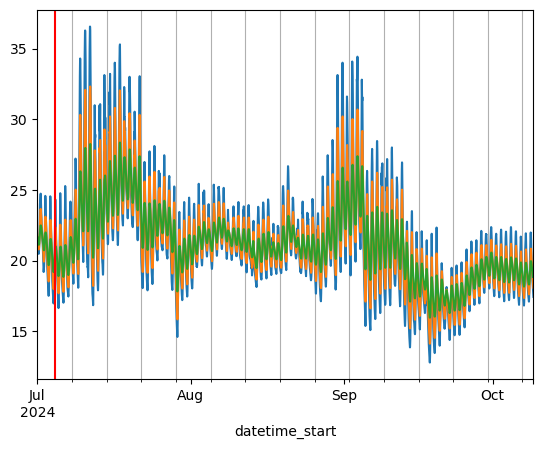

In [11]:
soildfs = pd.read_parquet('../../station_data/all_soil_data.parquet')
utd_soilt = soildfs.loc['US-UTD'][['ts_3_1_1','ts_3_2_1','ts_3_3_1']].replace(-9999,np.nan)
utd_soilt = utd_soilt[utd_soilt.index >= '2024-07-01']#.resample('30T').mean()
utd_soilt['ts_3_1_1'].plot()
utd_soilt['ts_3_2_1'].shift(-1).plot()
utd_soilt['ts_3_3_1'].shift(-5).plot()
plt.axvline('2024-07-04 15:00',color='r')
#plt.xlim('2024-07-01','2024-07-08')
#plt.ylim(10,35)
plt.grid(True, which='minor')

Calculated lag: -2.5 hours


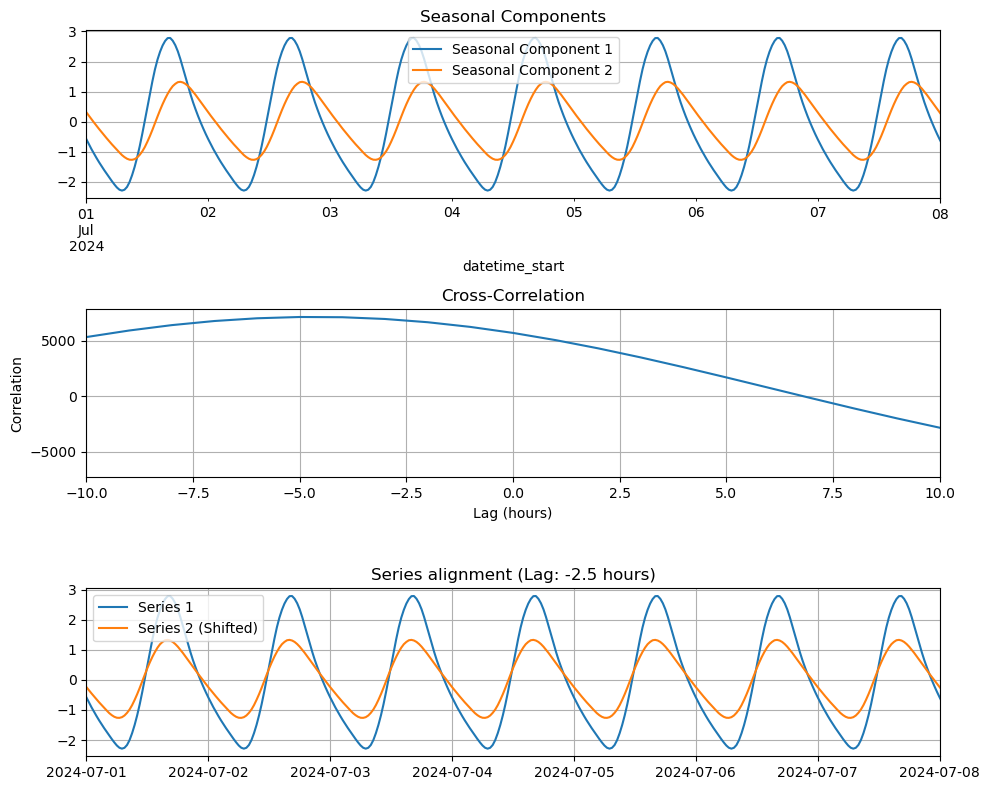

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.signal import correlate

# Function to decompose the seasonal component
def extract_seasonal(ts, period):
    decomposition = seasonal_decompose(ts, model='additive', period=period)
    return decomposition.seasonal

# Function to calculate lag between two seasonal series using cross-correlation
def calculate_lag(seasonal1, seasonal2):
    n = len(seasonal1)
    correlation = correlate(seasonal1 - np.mean(seasonal1), seasonal2 - np.mean(seasonal2), mode='full')
    lags = np.arange(-n + 1, n)
    lag = lags[np.argmax(correlation)]
    return lag, correlation, lags

ts1 = utd_soilt['ts_3_2_1']
ts2 = utd_soilt['ts_3_3_1']
#utd_soilt['ts_3_3_1'].shift(-5).plot()


# Extract seasonal components
seasonal1 = extract_seasonal(ts1, period=48)
seasonal2 = extract_seasonal(ts2, period=48)

# Calculate lag
lag, correlation, lags = calculate_lag(seasonal1.dropna(), seasonal2.dropna())

# Output
print(f"Calculated lag: {lag/2} hours")

# Plot seasonal components and correlation
fig, ax = plt.subplots(3, 1, figsize=(10, 8))

seasonal1.plot(ax=ax[0], label='Seasonal Component 1')
seasonal2.plot(ax=ax[0], label='Seasonal Component 2')
ax[0].legend()
ax[0].set_title('Seasonal Components')
ax[0].set_xlim(pd.to_datetime('2024-07-01'),pd.to_datetime('2024-07-08'))
ax[0].grid(True)

ax[1].plot(lags, correlation)
ax[1].set_title('Cross-Correlation')
ax[1].set_xlabel('Lag (hours)')
ax[1].set_ylabel('Correlation')
ax[1].set_xlim(-10, 10)
ax[1].grid(True)

ax[2].plot(seasonal1.index, seasonal1, label='Series 1')
ax[2].plot(seasonal2.index + pd.Timedelta(hours=lag/2), seasonal2, label='Series 2 (Shifted)')
ax[2].legend()
ax[2].set_title(f'Series alignment (Lag: {lag/2} hours)')
ax[2].set_xlim(pd.to_datetime('2024-07-01'),pd.to_datetime('2024-07-08'))
ax[2].grid(True)
plt.tight_layout()
plt.show()



ImportError: cannot import name 'thermal_diffusivity_amplitude' from 'micromet' (c:\Users\paulinkenbrandt\Documents\GitHub\MicroMet\Notebooks\Processing Workflow Notebooks\../../../Micromet\micromet\__init__.py)

In [ ]:
cdf = pd.read_parquet('../../station_data/all_eddy_data.parquet')
ddf = pd.read_parquet('../../station_data/all_met_data.parquet')

for col in cdf.columns:
    if col in ddf.columns:
        print(col)


In [ ]:
ddf.head(10).to_clipboard()

In [ ]:
series = ddf.loc['US-UTD','t_si111_body'].replace(-9999,np.nan)
series.plot()
series.diff().plot()
new_series = series[series.diff()<2].diff().cumsum()
new_series.plot()

In [ ]:
config = configparser.ConfigParser()

config.read('../../secrets/config.ini')

from sqlalchemy import create_engine
import urllib.parse
host = config['DEFAULT']['ip']
pw = config['DEFAULT']['pw']
user = config['DEFAULT']['login']

encoded_password = urllib.parse.quote_plus(pw)

def postconn_et(encoded_password, host='localhost',user='postgres',port='5432',db='groundwater', schema = 'groundwater'):
    connection_text = "postgresql+psycopg2://{:}:{:}@{:}:{:}/{:}?gssencmode=disable".format(user,encoded_password,host,port,db)
    return create_engine(connection_text, connect_args={'options': '-csearch_path={}'.format(schema)})


engine = postconn_et(encoded_password, host=host, user=user)

In [ ]:
cdf.to_sql(name = 'amfluxeddy',
           schema='groundwater',
           con=engine,
           if_exists='replace',
           chunksize=2000)

In [ ]:
soildfs.to_sql(name = 'amfluxmet',
           schema='groundwater',
           con=engine,
           if_exists='replace',
           chunksize=2000)